# How Length of Stay is Affected by Customer and Hotel Properties
https://www.kaggle.com/datasets/mojtaba142/hotel-booking
Problem Statement:  
We want to generate a model to estimate the possible length of stay for potential customers based on historical booking data we have. Having this information, we will be able to push ads to potential customers in a more accurate manner.

In [1]:
import pandas as pd
import numpy as np

## 1. Data Quick Look

In [2]:
hotel = pd.read_csv("../data/hotel_booking.csv")
pd.set_option('display.max_columns', None)
display(hotel)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3.0,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4.0,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0.0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0.0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0.0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0.0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0.0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


### 1.1. Narrow Down Investigation
1. Look at non-canceled bookings that were eventually checked out
2. Remove columns with fake information and spoilers (adr)
3. Define target y: 'stays_total' = 'stays_in_weekend_nights' + 'stays_in_week_nights'

In [3]:
#df = hotel[hotel['hotel'] == 'City Hotel']
df = hotel.copy()
df = df[df['is_canceled'] == 0]
df = df[df['reservation_status'] == 'Check-Out']
df = df.drop(columns = 
             ['is_canceled', 'reservation_status', 'reservation_status_date', 
              'name', 'email', 'phone-number', 'credit_card', 'adr'])

df['stays_total'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df = df.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights'])
display(df)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,stays_total
0,Resort Hotel,342,2015,July,27,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3.0,No Deposit,NaN,NaN,0,Transient,0,0,0
1,Resort Hotel,737,2015,July,27,1,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4.0,No Deposit,NaN,NaN,0,Transient,0,0,0
2,Resort Hotel,7,2015,July,27,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0.0,No Deposit,NaN,NaN,0,Transient,0,0,1
3,Resort Hotel,13,2015,July,27,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0.0,No Deposit,304.0,NaN,0,Transient,0,0,1
4,Resort Hotel,14,2015,July,27,1,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,240.0,NaN,0,Transient,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0.0,No Deposit,394.0,NaN,0,Transient,0,0,7
119386,City Hotel,102,2017,August,35,31,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0.0,No Deposit,9.0,NaN,0,Transient,0,2,7
119387,City Hotel,34,2017,August,35,31,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0.0,No Deposit,9.0,NaN,0,Transient,0,4,7
119388,City Hotel,109,2017,August,35,31,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0.0,No Deposit,89.0,NaN,0,Transient,0,0,7


### 1.2. Data Type Check

In [4]:
df['agent'] = df['agent'].astype(str)
df['company'] = df['company'].astype(str)
df['arrival_date_month'] = df['arrival_date_month'].map(
    {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
     'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75166 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75166 non-null  object 
 1   lead_time                       75166 non-null  int64  
 2   arrival_date_year               75166 non-null  int64  
 3   arrival_date_month              75166 non-null  int64  
 4   arrival_date_week_number        75166 non-null  int64  
 5   arrival_date_day_of_month       75166 non-null  int64  
 6   adults                          75166 non-null  int64  
 7   children                        75166 non-null  float64
 8   babies                          75166 non-null  int64  
 9   meal                            75166 non-null  object 
 10  country                         74745 non-null  object 
 11  market_segment                  75166 non-null  object 
 12  distribution_channel           

In [6]:
df.describe()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,stays_total
count,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75166.000000,75162.000000,75166.000000,75166.000000,75166.000000,75166.000000
mean,79.984687,2016.147514,6.526355,27.080143,15.839529,1.829737,0.102347,0.010377,0.043344,0.015792,0.202977,0.293366,1.589868,0.099300,0.714060,3.393023
std,91.109888,0.703124,3.153543,13.902478,8.776422,0.510451,0.390836,0.113007,0.203632,0.272421,1.810713,0.736279,14.784875,0.303176,0.833887,2.577671
min,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,2016.000000,4.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,45.000000,2016.000000,7.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,124.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,737.000000,2017.000000,12.000000,53.000000,31.000000,4.000000,3.000000,10.000000,1.000000,13.000000,72.000000,21.000000,379.000000,8.000000,5.000000,69.000000


array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_month'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>],
       [<AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>,
        <AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:title={'center':'stays_total'}>]], dtype=object)

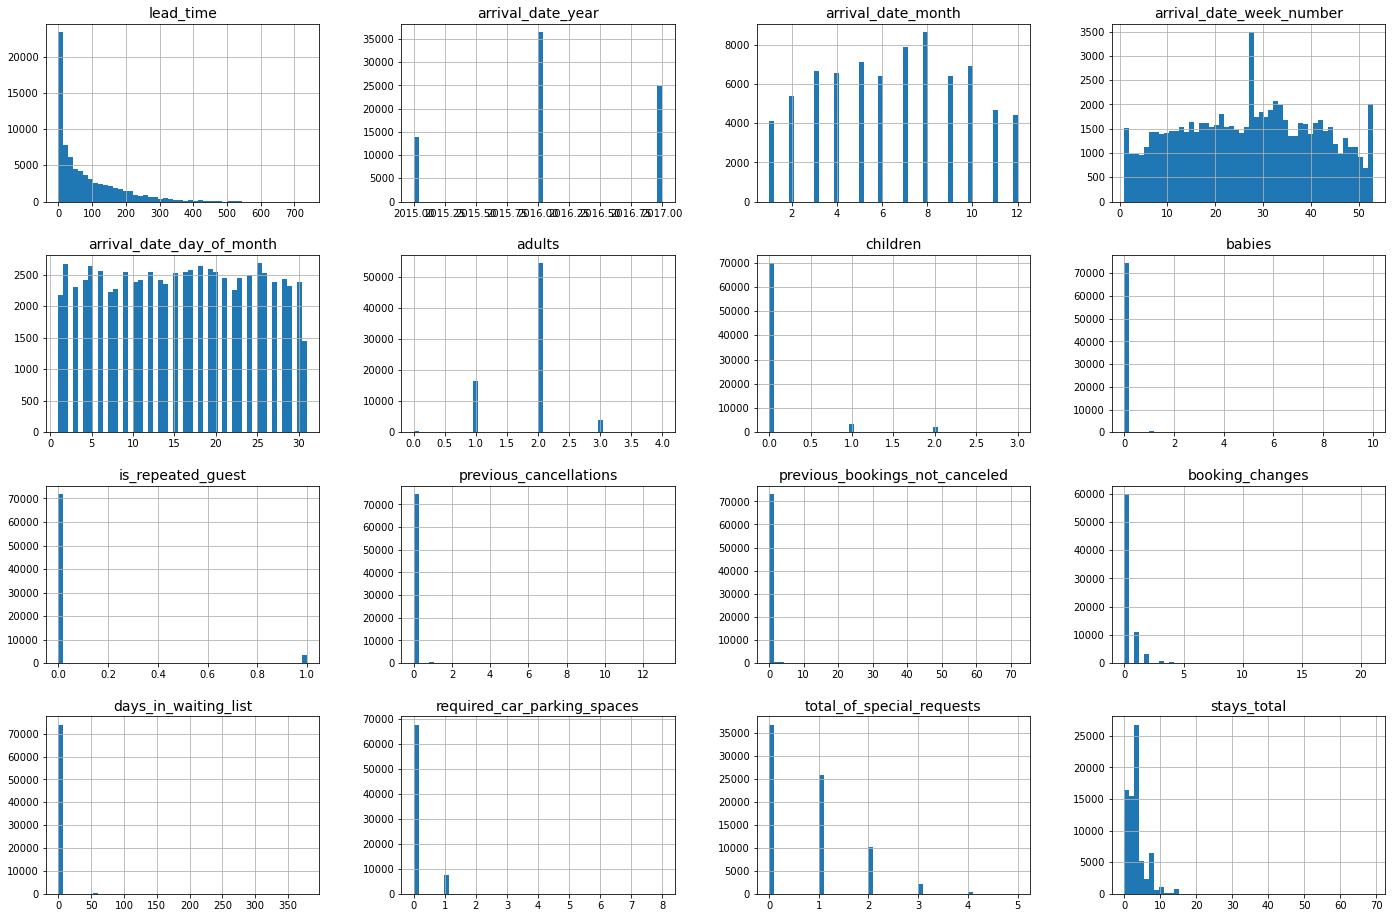

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(24, 16))
#save_fig("attribute_histogram_plots")  # extra code

### 1.3. Profiling and Correlation

In [8]:
#remove overly unified columns
df = df.drop(columns = ['is_repeated_guest', 'previous_cancellations', 'distribution_channel', 
                        'previous_bookings_not_canceled', 'deposit_type', 'days_in_waiting_list', 
                        'required_car_parking_spaces'])

Reminding customers to book for hotel as early as possible might be helpful

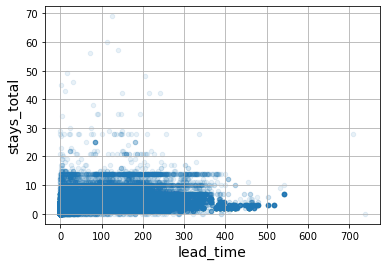

In [9]:
df.plot(kind="scatter", x="lead_time", y="stays_total",
             alpha=0.1, grid=True)
#save_fig("leadtime_vs_days_stayed_scatterplot")  # extra code
plt.show()

### 1.4. Experimenting with Attribute Combinations

In [10]:
df['total_ppl'] = df['adults'] + df['children'] + df['babies']

## 2. Prepare the Data for Machine Learning Algorithms

### 2.1. Data Cleaning - Handle NAs

In [11]:
#randomly remove some numbers for demostration purpose
import random

df_withnull = df.copy()
null_rows = random.sample(df_withnull.index.to_list(), 6)
df_withnull.loc[null_rows,'children'] = np.nan


In [12]:
null_rows_idx = df_withnull.isnull().any(axis=1)
df_withnull.loc[null_rows_idx].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,reserved_room_type,assigned_room_type,booking_changes,agent,company,customer_type,total_of_special_requests,stays_total,total_ppl
30,Resort Hotel,118,2015,7,27,1,1,0.0,0,BB,NaN,Direct,A,A,2.0,nan,nan,Transient,2,14,1.0
53,Resort Hotel,3,2015,7,27,2,2,0.0,0,BB,ESP,Online TA,A,C,NaN,240.0,nan,Transient,0,1,2.0
84,Resort Hotel,99,2015,7,27,3,2,0.0,0,HB,GBR,Offline TA/TO,E,E,NaN,115.0,nan,Contract,0,10,2.0
118,Resort Hotel,79,2015,7,27,4,2,1.0,0,HB,PRT,Direct,D,D,NaN,250.0,nan,Transient,1,10,3.0
197,Resort Hotel,8,2015,7,28,7,2,0.0,0,BB,PRT,Online TA,A,E,NaN,240.0,nan,Transient,1,0,2.0


In [13]:
# Categorical: remove rows with NAs
df.dropna(subset=["country", "booking_changes"], inplace=True)
df_withnull.dropna(subset=["country"], inplace=True)

df_withnull.loc[null_rows_idx].head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,reserved_room_type,assigned_room_type,booking_changes,agent,company,customer_type,total_of_special_requests,stays_total,total_ppl
53,Resort Hotel,3,2015,7,27,2,2,0.0,0,BB,ESP,Online TA,A,C,NaN,240.0,nan,Transient,0,1,2.0
84,Resort Hotel,99,2015,7,27,3,2,0.0,0,HB,GBR,Offline TA/TO,E,E,NaN,115.0,nan,Contract,0,10,2.0
118,Resort Hotel,79,2015,7,27,4,2,1.0,0,HB,PRT,Direct,D,D,NaN,250.0,nan,Transient,1,10,3.0
197,Resort Hotel,8,2015,7,28,7,2,0.0,0,BB,PRT,Online TA,A,E,NaN,240.0,nan,Transient,1,0,2.0
5893,Resort Hotel,213,2016,5,21,16,2,NaN,0,HB,DEU,Groups,A,C,0.0,298.0,nan,Transient-Party,0,2,2.0


In [14]:
#Numerical: fill NAs by median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
df_withnull_num = df_withnull.select_dtypes(include=[np.number])
imputer.fit(df_withnull_num)
#imputer.statistics_ should be the same as housing_num.median().values
#imputer.strategy is 'median'
X_withnull = imputer.transform(df_withnull_num)
df_imputed = pd.DataFrame(X_withnull, columns=df_withnull_num.columns,
                          index=df_withnull_num.index)

df_imputed.loc[null_rows_idx].head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,booking_changes,total_of_special_requests,stays_total,total_ppl
53,3.0,2015.0,7.0,27.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
84,99.0,2015.0,7.0,27.0,3.0,2.0,0.0,0.0,0.0,0.0,10.0,2.0
118,79.0,2015.0,7.0,27.0,4.0,2.0,1.0,0.0,0.0,1.0,10.0,3.0
197,8.0,2015.0,7.0,28.0,7.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0
5893,213.0,2016.0,5.0,21.0,16.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0


### 2.2. Drop Outliers

In [15]:
from sklearn.ensemble import IsolationForest

X = df.select_dtypes(include=[np.number])

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [16]:
df_no_outlier = df.iloc[outlier_pred == 1]

df_outlier = df.iloc[outlier_pred == -1]
print('dropped rows:', df_outlier.shape[0])
#housing_labels = housing_labels.iloc[outlier_pred == 1]

dropped rows: 13074


### 2.3. Handling Text and Categorical Attributes

In [17]:
df_cat = df[['hotel','meal', 'country', 'market_segment', 'reserved_room_type', 
             'assigned_room_type',  'agent', 'company', 'customer_type']] 
df_cat.head(10)

,hotel,meal,country,market_segment,reserved_room_type,assigned_room_type,agent,company,customer_type
0,Resort Hotel,BB,PRT,Direct,C,C,nan,nan,Transient
1,Resort Hotel,BB,PRT,Direct,C,C,nan,nan,Transient
2,Resort Hotel,BB,GBR,Direct,A,C,nan,nan,Transient
3,Resort Hotel,BB,GBR,Corporate,A,A,304.0,nan,Transient
4,Resort Hotel,BB,GBR,Online TA,A,A,240.0,nan,Transient
5,Resort Hotel,BB,GBR,Online TA,A,A,240.0,nan,Transient
6,Resort Hotel,BB,PRT,Direct,C,C,nan,nan,Transient
7,Resort Hotel,FB,PRT,Direct,C,C,303.0,nan,Transient
11,Resort Hotel,HB,PRT,Online TA,D,D,240.0,nan,Transient
12,Resort Hotel,BB,USA,Online TA,D,E,240.0,nan,Transient


#### 2.3.1. Ordinal Encoding

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
#ordinal_encoder.categories_ prints the unique values of the columns
df_cat_encoded[:10]

array([[  1.,   0., 125.,   3.,   2.,   2., 313., 330.,   2.],
       [  1.,   0., 125.,   3.,   2.,   2., 313., 330.,   2.],
       [  1.,   0.,  57.,   3.,   0.,   2., 313., 330.,   2.],
       [  1.,   0.,  57.,   2.,   0.,   0., 146., 330.,   2.],
       [  1.,   0.,  57.,   6.,   0.,   0.,  97., 330.,   2.],
       [  1.,   0.,  57.,   6.,   0.,   0.,  97., 330.,   2.],
       [  1.,   0., 125.,   3.,   2.,   2., 313., 330.,   2.],
       [  1.,   1., 125.,   3.,   2.,   2., 145., 330.,   2.],
       [  1.,   2., 125.,   6.,   3.,   3.,  97., 330.,   2.],
       [  1.,   0., 158.,   6.,   3.,   4.,  97., 330.,   2.]])

#### 2.3.2. One-hot Encoding

In [19]:
from sklearn.preprocessing import OneHotEncoder

#set sparse=False so that we don't need to convert df_cat_1hot.toarray()
cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot
#cat_encoder.categories_

/Users/admin/opt/anaconda3/envs/python38/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

### 2.4. Feature Scaling
1. MinMax
2. Standardize
3. Percentile
4. Gamma Scaling

In [20]:
from sklearn.preprocessing import MinMaxScaler

df_num = df.select_dtypes(include=[np.number])
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
df_num_min_max_scaled = min_max_scaler.fit_transform(df_num)
df_num_min_max_scaled = pd.DataFrame(df_num_min_max_scaled, columns = df_num.columns)

In [21]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_num_std_scaled = std_scaler.fit_transform(df_num)
df_num_std_scaled = pd.DataFrame(df_num_std_scaled, columns = df_num.columns)

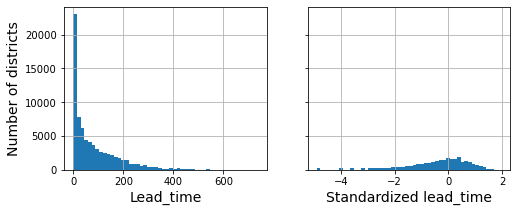

In [22]:
# sample visualization for standardization
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df["lead_time"].hist(ax=axs[0], bins=50)
df_num_std_scaled["lead_time"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Lead_time")
axs[1].set_xlabel("Standardized lead_time")
axs[0].set_ylabel("Number of districts")
#save_fig("long_tail_plot")
plt.show()

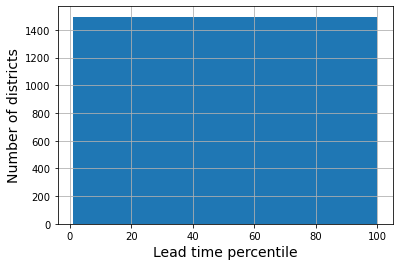

In [23]:
# sample visualization for percentile scaling
percentiles = [np.percentile(df["lead_time"].rank(method='first'), p)
               for p in range(1, 100)]
flattened_leadtime = pd.cut(df["lead_time"].rank(method='first'),bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_leadtime.hist(bins=50)
plt.xlabel("Lead time percentile")
plt.ylabel("Number of districts")
plt.show()

Gamma:   
1. compute the rbf (gaussian) kernel between $X$ and $Y$
2. Do gamma scaling

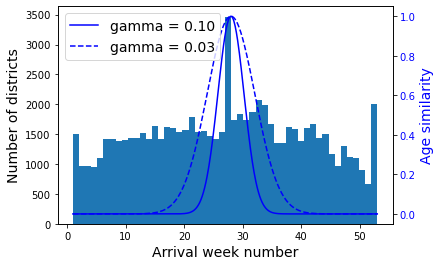

In [24]:
from sklearn.metrics.pairwise import rbf_kernel

arrive_simil_28 = rbf_kernel(df[["arrival_date_week_number"]], [[28]], gamma=0.1)

week = np.linspace(df["arrival_date_week_number"].min(),
                   df["arrival_date_week_number"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(week, [[28]], gamma=gamma1)
rbf2 = rbf_kernel(week, [[28]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Arrival week number")
ax1.set_ylabel("Number of districts")
ax1.hist(df["arrival_date_week_number"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(week, rbf1, color=color, label="gamma = 0.10")
ax2.plot(week, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
#save_fig("age_similarity_plot")
plt.show()

#### 2.4.1 Try standardized target and tranform back

In [25]:
from sklearn.linear_model import LinearRegression

df_booking = df.drop(columns = ['stays_total'])
df_labels = df[['stays_total']]

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(df_labels)

model = LinearRegression()
model.fit(df_booking[["total_ppl"]], scaled_labels)
some_new_data = df_booking[["total_ppl"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [26]:
predictions

array([[3.42397767],
       [3.42397767],
       [2.94227857],
       [2.94227857],
       [3.42397767]])

In [27]:
#another way to do it
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(df_booking[["total_ppl"]], df_labels)
predictions = model.predict(some_new_data)

predictions

array([[3.42397767],
       [3.42397767],
       [2.94227857],
       [2.94227857],
       [3.42397767]])

#### 2.4.2. Customize Transformer
1. Log Transformer
2. rbf  
  rbf for latitude and longitude: change kw_args=dict(Y=center coordinate, gamma=0.1) (not applicable)  
3. Ratio Transformer
4. Cluster labeling

In [28]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_leadtime = log_transformer.transform(df[["lead_time"]])

log_leadtime

/Users/admin/opt/anaconda3/envs/python38/lib/python3.8/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,lead_time
0,5.834811
1,6.602588
2,1.945910
3,2.564949
4,2.639057
...,...
119385,3.135494
119386,4.624973
119387,3.526361
119388,4.691348


In [29]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[28.]], gamma=0.1))
week_simil_28 = rbf_transformer.transform(df[["arrival_date_week_number"]])
week_simil_28

array([[0.90483742],
       [0.90483742],
       [0.90483742],
       ...,
       [0.00744658],
       [0.00744658],
       [0.00744658]])

In [30]:
# add one to remove inf cases generated by division
ratio_transformer = FunctionTransformer(lambda X: X.iloc[:, 0] / (X.iloc[:, 1]+1))
ratio_transformer.transform(df[['lead_time', 'booking_changes']])

0          85.5
1         147.4
2           7.0
3          13.0
4          14.0
          ...  
119385     23.0
119386    102.0
119387     34.0
119388    109.0
119389    205.0
Length: 74741, dtype: float64

### 2.5. Transformation Pipelines

### 2.5.1 Pipeline to preprocess hotel booking data 

In [31]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log),
    StandardScaler())
#cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

#("cat", cat_pipeline, make_column_selector(dtype_include=object)),
preprocessing = ColumnTransformer([
    ("log", log_pipeline, ['arrival_date_week_number', 'arrival_date_day_of_month']),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [32]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'reserved_room_type', 'assigned_room_type', 'booking_changes', 'agent',
       'company', 'customer_type', 'total_of_special_requests', 'stays_total',
       'total_ppl'],
      dtype='object')

Aggregate categories

In [33]:
df.loc[:,'country'] = np.where((df['country']=='PRT')|(df['country']=='FRA')|(df['country']=='DEU'), df.loc[:,'country'], 'Other')
df.loc[:,'market_segment'] = np.where((df['market_segment']=='Online TA')|(df['market_segment']=='Offline TA/TO')|(df['market_segment']=='Direct'), df.loc[:,'market_segment'], 'Other')
df.loc[:,'agent'] = np.where((df['agent']=='9'), df.loc[:,'agent'], 'Other')
df.loc[:,'company'] = np.where((df['company']=='40'), df.loc[:,'company'], 'Other')
df.loc[:,'company'] = np.where((df['hotel']=='Resort Hotel'), 1, 0)

In [34]:
df_prepared = preprocessing.fit_transform(df)
df_prepared.shape

(74741, 52)

In [35]:
df_prepared

array([[ 0.26797044, -3.04052122,  0.        , ..., -0.8576587 ,
        -1.3281764 ,  0.08138598],
       [ 0.26797044, -3.04052122,  0.        , ..., -0.8576587 ,
        -1.3281764 ,  0.08138598],
       [ 0.26797044, -3.04052122,  0.        , ..., -0.8576587 ,
        -0.93727724, -1.41317654],
       ...,
       [ 0.61185884,  1.11068253,  1.        , ...,  3.93871003,
         1.40811771,  0.08138598],
       [ 0.61185884,  1.11068253,  1.        , ..., -0.8576587 ,
         1.40811771,  0.08138598],
       [ 0.61185884,  1.03006211,  1.        , ...,  1.54052567,
         2.18991603,  0.08138598]])

## 3. Causal Inference
In this section, I am analyzing whether an early-bird booking policy would affect the length of stay of a customer in a hotel. CausalML is a package dedicated to causal inference analysis, which can help me quantify the affect of the policy.</br>
For this dataset, assume that customers who had leadtime greater than 60 days are those who were granted the early-bird booking opportunity; the rest are assumed not to be able to book more than 60 days prior to his/her check-in date.</br>
The following are some importance factors for the causal inference analysis
target: length of stay  
treatment group: booking available 2 months prior to the check-in date  
control group: booking available no more than 2 months prior to the chech-in date  

In [37]:
#!conda install -c anaconda py-xgboost
import scipy.stats
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import causalml
import xgboost
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor

#from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier

import shap
import matplotlib.pyplot as plt

import time
from causalml.metrics import *
from sklearn.model_selection import train_test_split

### 3.1. Preparing Data for Causal Inference
df_prepared: with logged and standardized numerical features  
df_dummy: with only dummified categorical features

In [38]:
df_dummy = pd.get_dummies(df)
df_dummy

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,booking_changes,company,total_of_special_requests,stays_total,total_ppl,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,country_DEU,country_FRA,country_Other,country_PRT,market_segment_Direct,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Other,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,agent_Other,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,342,2015,7,27,1,2,0.0,0,3.0,1,0,0,2.0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,737,2015,7,27,1,2,0.0,0,4.0,1,0,0,2.0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,7,2015,7,27,1,1,0.0,0,0.0,1,0,1,1.0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,13,2015,7,27,1,1,0.0,0,0.0,1,0,1,1.0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,14,2015,7,27,1,2,0.0,0,0.0,1,1,2,2.0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,8,35,30,2,0.0,0,0.0,0,0,7,2.0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
119386,102,2017,8,35,31,3,0.0,0,0.0,0,2,7,3.0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
119387,34,2017,8,35,31,2,0.0,0,0.0,0,4,7,2.0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
119388,109,2017,8,35,31,2,0.0,0,0.0,0,0,7,2.0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [39]:
y = df_dummy['stays_total']

X = df_dummy.drop(columns = ['stays_total', 'lead_time'], inplace = False)
df_dummy['treatment'] = np.where(df_dummy['lead_time']>60, 1, 0)
treatment = np.where(df_dummy['lead_time']>60, 1, 0)

#y_std = df_prepared['stays_total']
#X_std = df_prepared.drop(columns = ['stays_total', 'lead_time'], inplace = False)
#df_prepared['treatment'] = np.where(df_prepared['lead_time']>60, 1, 0)
#treatment_std = np.where(df_prepared['lead_time']>60, 'treatment', 'control')

In [40]:
feature_names = X.columns
feature_names.to_list()

['arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'adults',
 'children',
 'babies',
 'booking_changes',
 'company',
 'total_of_special_requests',
 'total_ppl',
 'hotel_City Hotel',
 'hotel_Resort Hotel',
 'meal_BB',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'country_DEU',
 'country_FRA',
 'country_Other',
 'country_PRT',
 'market_segment_Direct',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Other',
 'reserved_room_type_A',
 'reserved_room_type_B',
 'reserved_room_type_C',
 'reserved_room_type_D',
 'reserved_room_type_E',
 'reserved_room_type_F',
 'reserved_room_type_G',
 'reserved_room_type_H',
 'reserved_room_type_L',
 'assigned_room_type_A',
 'assigned_room_type_B',
 'assigned_room_type_C',
 'assigned_room_type_D',
 'assigned_room_type_E',
 'assigned_room_type_F',
 'assigned_room_type_G',
 'assigned_room_type_H',
 'assigned_room_type_I',
 'assigned_room_type_K',
 'agent_Other',
 'cu

### 3.2 Causalml models
1. LR SRegressor
2. XGB TRegressor
3. LGBMRegressor with ST Learner

In [41]:
results = pd.DataFrame(columns = ['Base Model', 'Meta Learner', 'ATE', 'ATE_lower', 'ATE_upper', 'Important Features'])
results

,Base Model,Meta Learner,ATE,ATE_lower,ATE_upper,Important Features


### 3.2.1. Linear Regression with S Learner

In [42]:
treatment = np.where(df_dummy['lead_time']>60, 1, 0)

In [43]:
lr_S = LRSRegressor()
# Computing the Average Treatment Effect (ATE)
te, lb, ub = lr_S.estimate_ate(X, treatment, y)
print('Average Treatment Effect (LRSR): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (LRSR): 1.26 (1.22, 1.30)


In [44]:
LRslearner_tau = lr_S.fit_predict(X, treatment, y)
importance = lr_S.get_importance(X=X, 
                        tau=LRslearner_tau, 
                        method='auto', 
                        features=feature_names, 
                        random_state=42)
importance = pd.DataFrame(importance)
important_features = importance[importance[1]>0].index.tolist()
important_features

['arrival_date_month',
 'assigned_room_type_I',
 'arrival_date_year',
 'arrival_date_week_number']

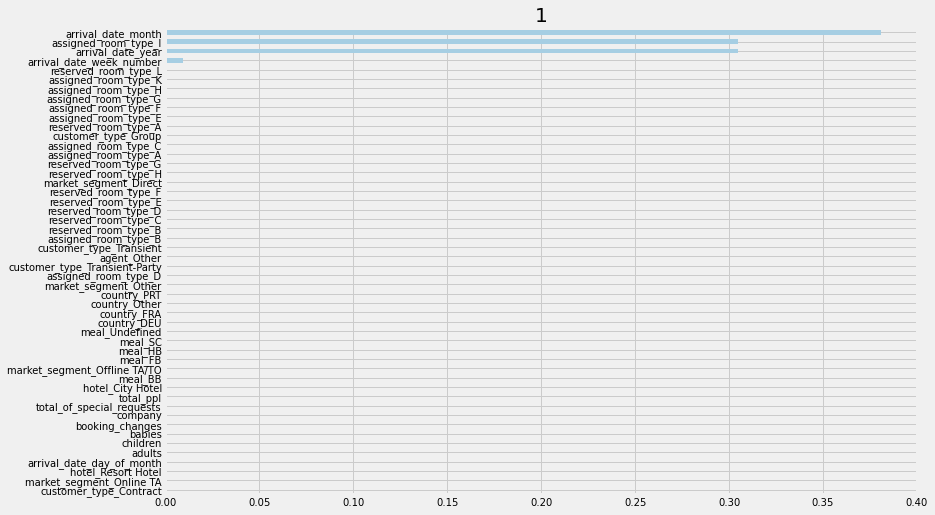

In [45]:
lr_S.plot_importance(X=X, 
                         tau=LRslearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names,
                  )

In [46]:
new_row = {'Base Model': 'Linear Regressor', 'Meta Learner': 'S Learner', 'ATE': te[0], 'ATE_lower': lb[0], 'ATE_upper': ub[0], 'Important Features': important_features}
results = results.append(new_row, ignore_index=True)
results

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Base Model,Meta Learner,ATE,ATE_lower,ATE_upper,Important Features
0,Linear Regressor,S Learner,1.25981,1.223734,1.295886,"[arrival_date_month, assigned_room_type_I, arr..."


### 3.2.2. XGBoost with T Learner

In [47]:
#base_xg = XGBRegressor(random_state=42)
#slearner = BaseSRegressor(base_xg, control_name='control')
xgb_T = XGBTRegressor(random_state=42)
te, lb, ub = xgb_T.estimate_ate(X, treatment, y)
print('Average Treatment Effect (XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (XGBoost): 1.26 (1.23, 1.29)


In [48]:
XGBtlearner_tau = xgb_T.fit_predict(X, treatment, y)
importance = xgb_T.get_importance(X=X, 
                        tau=XGBtlearner_tau, 
                        method='auto', 
                        features=feature_names, 
                        random_state=42)
importance = pd.DataFrame(importance)
important_features = importance[importance[1]>0.05].index.tolist()
important_features

['company',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'booking_changes']

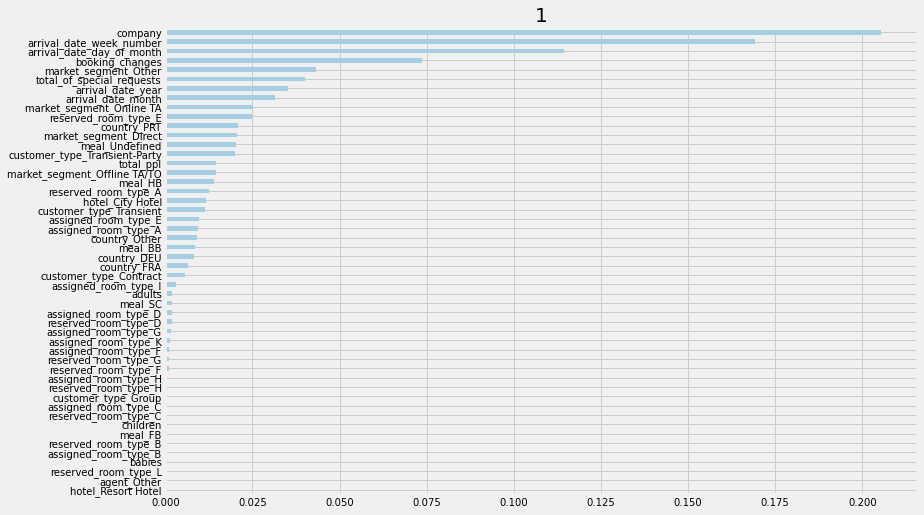

In [49]:
xgb_T.plot_importance(X=X, 
                         tau=XGBtlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names,
                  )

In [50]:
new_row = {'Base Model': 'XGBoost', 'Meta Learner': 'T Learner', 'ATE': te[0], 'ATE_lower': lb[0], 'ATE_upper': ub[0], 'Important Features': important_features}
results = results.append(new_row, ignore_index=True)
results

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Base Model,Meta Learner,ATE,ATE_lower,ATE_upper,Important Features
0,Linear Regressor,S Learner,1.25981,1.223734,1.295886,"[arrival_date_month, assigned_room_type_I, arr..."
1,XGBoost,T Learner,1.261205,1.234557,1.287853,"[company, arrival_date_week_number, arrival_da..."


### 3.2.3. LightGBM with S, T Learner

In [51]:
from lightgbm import LGBMRegressor
treatment = np.where(df_dummy['lead_time']>60, 'treatment', 'control')
base_algo = LGBMRegressor()
# base_algo = XGBRegressor()
# base_algo = RandomForestRegressor()
# base_algo = LinearRegression()

lgbm_Slearner = BaseSRegressor(base_algo, control_name='control')
te = lgbm_Slearner.estimate_ate(X, treatment, y)
print('Average Treatment Effect (LightGBM with S Learner): {:.2f}'.format(te[0]))

Average Treatment Effect (LightGBM with S Learner): 1.21


In [52]:
slearner_tau = lgbm_Slearner.fit_predict(X, treatment, y)
importance = lgbm_Slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)
importance = pd.DataFrame(importance)
important_features = importance[importance['treatment']>0.05].index.tolist()
important_features

['company', 'customer_type_Transient-Party', 'arrival_date_day_of_month']

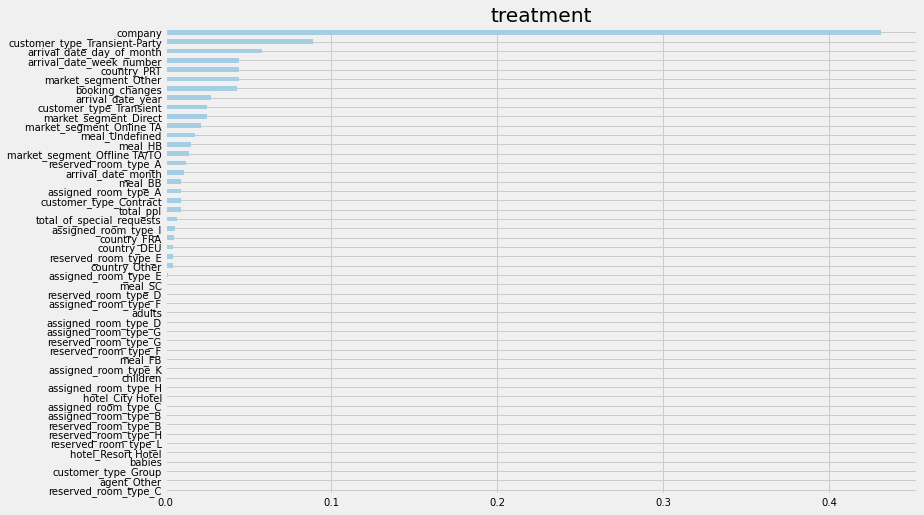

In [53]:
lgbm_Slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names,
                  )

In [54]:
new_row = {'Base Model': 'LightGBM', 'Meta Learner': 'S Learner', 'ATE': te[0], 'ATE_lower': np.nan, 'ATE_upper': np.nan, 'Important Features': important_features}
results = results.append(new_row, ignore_index=True)
results

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Base Model,Meta Learner,ATE,ATE_lower,ATE_upper,Important Features
0,Linear Regressor,S Learner,1.25981,1.223734,1.295886,"[arrival_date_month, assigned_room_type_I, arr..."
1,XGBoost,T Learner,1.261205,1.234557,1.287853,"[company, arrival_date_week_number, arrival_da..."
2,LightGBM,S Learner,1.211994,NaN,NaN,"[company, customer_type_Transient-Party, arriv..."


In [55]:
base_algo = LGBMRegressor()

lgbm_Tlearner = BaseTRegressor(base_algo, control_name='control')
te, lb, ub = lgbm_Tlearner.estimate_ate(X, treatment, y)
print('Average Treatment Effect (LightGBM with T Learner): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))
tlearner_tau = lgbm_Tlearner.fit_predict(X, treatment, y)
importance = lgbm_Tlearner.get_importance(X=X, 
                        tau=tlearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)
importance = pd.DataFrame(importance)
important_features = importance[importance['treatment']>0.05].index.tolist()

new_row = {'Base Model': 'LightGBM', 'Meta Learner': 'T Learner', 'ATE': te[0], 'ATE_lower': lb[0], 'ATE_upper': ub[0], 'Important Features': important_features}
results = results.append(new_row, ignore_index=True)
results

Average Treatment Effect (LightGBM with T Learner): 1.23 (1.20, 1.25)


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Base Model,Meta Learner,ATE,ATE_lower,ATE_upper,Important Features
0,Linear Regressor,S Learner,1.25981,1.223734,1.295886,"[arrival_date_month, assigned_room_type_I, arr..."
1,XGBoost,T Learner,1.261205,1.234557,1.287853,"[company, arrival_date_week_number, arrival_da..."
2,LightGBM,S Learner,1.211994,NaN,NaN,"[company, customer_type_Transient-Party, arriv..."
3,LightGBM,T Learner,1.226075,1.197698,1.254451,"[company, arrival_date_week_number, arrival_da..."


By Looking at the result table, we can tell that treatment effect on the length of stay is about 1.23, which means that customers tend to stay on average 1.23 days longer at hotel when they can make reservations earlier. Other features that contributed to the causal analysis are: </br>
1. Whether the traveller booked the hotel through company #40 or not
2. The arrival date of the traveller
3. Whether the assigned room is of type I
4. Whether the traveller is seeking transient/urgent hotel stay.

### 3.3. Model Evaluation

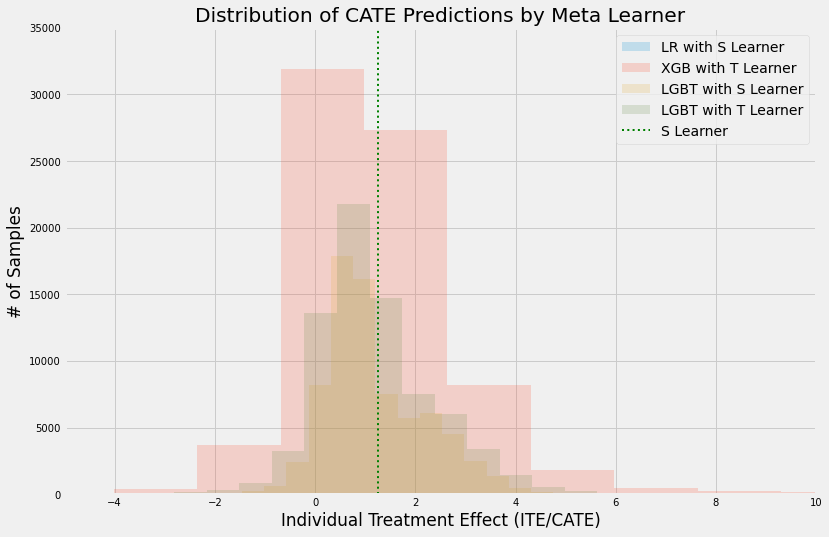

In [56]:
alpha=0.2
bins=50
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.xlim([-5, 10])
plt.ylim([0, 35000])
#plt.xticks(np.arange(-5, 10, step=1))
plt.hist(LRslearner_tau, alpha=alpha, bins=bins, label='LR with S Learner')
plt.hist(XGBtlearner_tau, alpha=alpha, bins=bins, label='XGB with T Learner')
plt.hist(slearner_tau, alpha=alpha, bins=bins, label='LGBT with S Learner')
plt.hist(tlearner_tau, alpha=alpha, bins=bins, label='LGBT with T Learner')
plt.axvline(x = LRslearner_tau[0], label='S Learner', linestyle='dotted', color='green', linewidth=2)
plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_= plt.legend()

The above plot shows how the causal model performs with different data volumes. XGBT reaches the optimal solution the fastest. However, the range of the estimation of ITE is a bit larger than the results given by the rest of the models. LightGBMT model gives the shortest range among the models. And all the models indicate that the early-bird policy has affected travellers' length of stays.

### Shapely Values

In [57]:
shap_slearner = lgbm_Tlearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner

{'treatment': array([[-0.49738254, -0.00720053, -0.04207227, ...,  0.        ,
          0.01599901,  0.05905749],
        [-0.49808315, -0.00702507, -0.0414044 , ...,  0.        ,
          0.01737363,  0.05522778],
        [-0.31246645, -0.03985081, -0.04087844, ...,  0.        ,
          0.02634768,  0.03326925],
        ...,
        [ 0.0628428 ,  0.02070984,  0.15523811, ...,  0.        ,
          0.06939339,  0.03675459],
        [ 0.05438173,  0.01725399,  0.1386269 , ...,  0.        ,
          0.07149229,  0.0342935 ],
        [ 0.06047909,  0.01390567,  0.10326911, ...,  0.        ,
          0.1099435 ,  0.04411984]])}

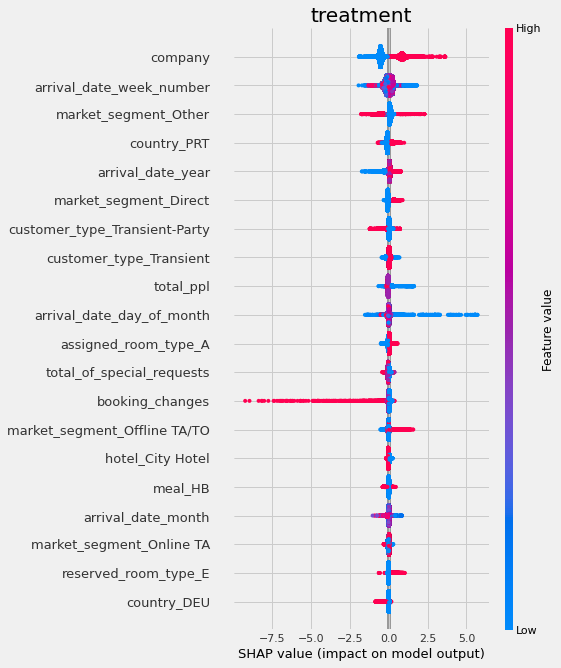

In [58]:
#np.mean(np.abs(shap_slearner['treatment_A']),axis=0)
# Plot shap values without specifying shap_dict
lgbm_Tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)

The above SHAP plot shows the impact of features on model output. Some insights can be drawn from the plots are: </br>
1. Ordering through company 40 increases the prediction of the length of stay
2. Travellers who arrive at the beginning of the month tend to be given longer predicted length of stay
3. If the booking was changed before arrival, the prediction tends to be shorter

### 3.3. CATE analysis

In [59]:
# Computing the Individual Treatment Effect
treatment2 = np.where(df_dummy['lead_time']>60, 'treatment', 'control')
CATE_T = lgbm_Tlearner.fit_predict(X, treatment2,y)
#cate_df = pd.DataFrame(CATE_T)
#cate_df.value_counts()

In [60]:
df_cate = df.copy()
df_cate['CATE'] = CATE_T
df_cate

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,reserved_room_type,assigned_room_type,booking_changes,agent,company,customer_type,total_of_special_requests,stays_total,total_ppl,CATE
0,Resort Hotel,342,2015,7,27,1,2,0.0,0,BB,PRT,Direct,C,C,3.0,Other,1,Transient,0,0,2.0,2.239533
1,Resort Hotel,737,2015,7,27,1,2,0.0,0,BB,PRT,Direct,C,C,4.0,Other,1,Transient,0,0,2.0,-0.586405
2,Resort Hotel,7,2015,7,27,1,1,0.0,0,BB,Other,Direct,A,C,0.0,Other,1,Transient,0,1,1.0,3.030271
3,Resort Hotel,13,2015,7,27,1,1,0.0,0,BB,Other,Other,A,A,0.0,Other,1,Transient,0,1,1.0,5.219321
4,Resort Hotel,14,2015,7,27,1,2,0.0,0,BB,Other,Online TA,A,A,0.0,Other,1,Transient,1,2,2.0,2.261608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,8,35,30,2,0.0,0,BB,Other,Offline TA/TO,A,A,0.0,Other,0,Transient,0,7,2.0,0.824440
119386,City Hotel,102,2017,8,35,31,3,0.0,0,BB,FRA,Online TA,E,E,0.0,Other,0,Transient,2,7,3.0,1.103986
119387,City Hotel,34,2017,8,35,31,2,0.0,0,BB,DEU,Online TA,D,D,0.0,Other,0,Transient,4,7,2.0,0.780159
119388,City Hotel,109,2017,8,35,31,2,0.0,0,BB,Other,Online TA,A,A,0.0,Other,0,Transient,0,7,2.0,1.185992


In [61]:
df_cate[['hotel', 'CATE']][df_cate['stays_total']>0].groupby(['hotel']).mean()

,CATE
hotel,
City Hotel,0.643348
Resort Hotel,2.162243


Early bird reservation has mroe effect on resort hotels

In [62]:
df_cate[['arrival_date_month', 'CATE']][df_cate['stays_total']>0].groupby(['arrival_date_month']).mean().sort_values(by='CATE', ascending = False)

,CATE
arrival_date_month,
8,1.475883
6,1.465980
7,1.465112
1,1.463273
2,1.420198
12,1.301697
3,1.215348
5,1.116318
9,1.069626


In [63]:
df_cate[['company', 'CATE']][df_cate['stays_total']>0].groupby(['company']).mean().sort_values(by='CATE', ascending = False)

,CATE
company,
1,2.162243
0,0.643348


By Looking at the CATE for different groups, we can tell that the impact of the early-bird policy is obvious for Resort Hotels, but it has little impact on City Hotels. The difference is not explicit for different months of the year. And we can validate that the impact of the policy is more valid for customers who made booking through company #40 than the rest.